In [97]:
import pandas as pd

In [98]:
CourseName = input("Enter a course name to see it's stats: ")
# TPC River Highlands - Cromwell, CT
# Augusta National Golf Club - Augusta, GA
# The Country Club - Brookline, MA
# easy access for testing

In [99]:
fullDF = pd.read_excel('PGAData2015-2022.xlsx')
CourseDF = fullDF[fullDF['course'] == CourseName]

In [100]:
CourseDF.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
1129,A. Hadwin,401353222,5548,280,279,58.0,52.9,60,3,8.6,...,17.5,2022,0,T7,1.30,0.80,0.54,0.21,1.54,2.85
1130,A. Noren,401353222,3832,140,146,17.0,11.8,22,0,0.0,...,17.5,2022,0,CUT,-1.42,0.73,0.87,-0.81,0.80,-0.62
1131,A. Putnam,401353222,5502,280,286,45.5,37.5,51,0,0.0,...,17.5,2022,0,T31,1.43,0.60,-0.48,-0.45,-0.34,1.09
1132,A. Schenk,401353222,10372,280,284,53.0,42.8,54,0,12.2,...,17.5,2022,0,T24,0.66,0.65,0.14,0.14,0.93,1.59
1133,A. Scott,401353222,388,280,282,54.0,46.8,56,0,1.2,...,17.5,2022,0,T14,0.54,0.79,1.20,-0.43,1.55,2.10


In [101]:
averageStats = CourseDF.groupby('Finish').mean()
averageStats.head()

C:\Users\fieng\AppData\Local\Temp\ipykernel_15888\2603966571.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averageStats = CourseDF.groupby('Finish').mean()


,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,...,Unnamed: 4,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
Finish,,,,,,,,,,,,,,,,,,,,,
1,401353222.0,9037.0,280.0,274.0,70.5,65.9,65.0,0.0,16.8,0.0,...,NaN,17.5,2022.0,0.0,0.06,1.41,1.43,1.20,4.04,4.09
4,401353222.0,5860.0,280.0,277.0,54.5,51.0,69.0,3.0,11.8,4.0,...,NaN,17.5,2022.0,0.0,0.94,0.30,2.30,-0.19,2.41,3.35
23,401353222.0,4602673.0,280.0,283.0,50.5,43.8,57.0,3.0,5.6,4.0,...,NaN,17.5,2022.0,0.0,1.10,1.03,-0.41,0.13,0.75,1.84
55,401353222.0,6798.0,280.0,292.0,47.0,32.6,38.0,0.0,2.0,0.0,...,NaN,17.5,2022.0,0.0,0.24,-1.06,-0.43,0.84,-0.65,-0.41
63,401353222.0,5462.0,280.0,298.0,40.5,22.6,35.0,0.0,6.4,0.0,...,NaN,17.5,2022.0,0.0,-0.78,-1.01,-0.96,0.85,-1.13,-1.91


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

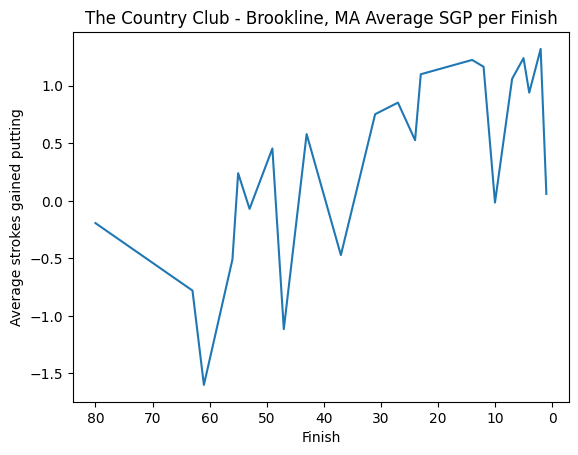

In [103]:
#testing a line plot

# create a copy of the averageStats DataFrame and remove "T" and "cut" values from the index
averageStats_copy = averageStats.copy()
averageStats_copy.index = averageStats_copy.index.astype(str)
averageStats_copy.index = averageStats_copy.index.str.replace("CUT", "80").str.replace("W/D", "80").str.replace("WD", "80").str.replace("DQ", "80").str.replace("MDF", "80").str.replace("T", "").astype(int)
averageStats_copy = averageStats_copy.groupby(averageStats_copy.index).mean()
plt.plot(averageStats_copy.index, averageStats_copy["sg_putt"])
# add labels and title
plt.xlabel("Finish")
plt.ylabel("Average strokes gained putting")
plt.title(CourseName + " Average SGP per Finish")

plt.gca().invert_xaxis()
plt.show()

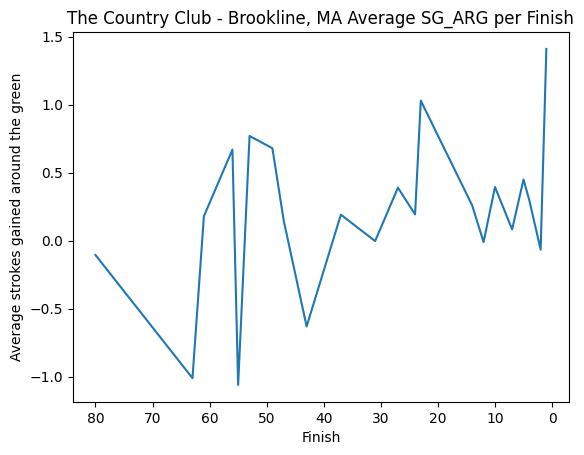

In [104]:
#testing a line plot

# create a copy of the averageStats DataFrame and remove "T" and "cut" values from the index
averageStats_copy = averageStats.copy()
averageStats_copy.index = averageStats_copy.index.astype(str)
averageStats_copy.index = averageStats_copy.index.str.replace("CUT", "80").str.replace("W/D", "80").str.replace("WD", "80").str.replace("DQ", "80").str.replace("MDF", "80").str.replace("T", "").astype(int)
averageStats_copy = averageStats_copy.groupby(averageStats_copy.index).mean()
plt.plot(averageStats_copy.index, averageStats_copy["sg_arg"])
# add labels and title
plt.xlabel("Finish")
plt.ylabel("Average strokes gained around the green")
plt.title(CourseName + " Average SG_ARG per Finish")

plt.gca().invert_xaxis()
plt.show()

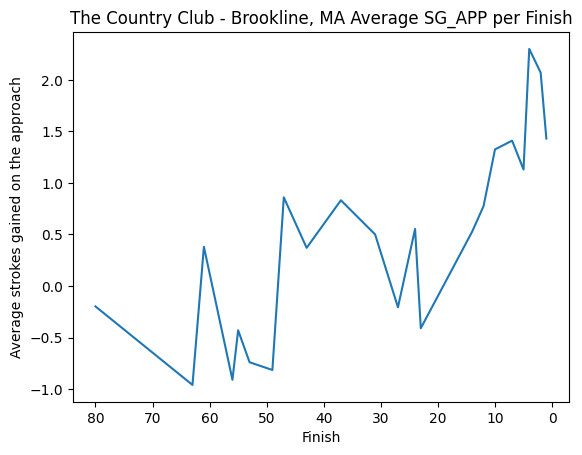

In [105]:
#testing a line plot

# create a copy of the averageStats DataFrame and remove "T" and "cut" values from the index
averageStats_copy = averageStats.copy()
averageStats_copy.index = averageStats_copy.index.astype(str)
averageStats_copy.index = averageStats_copy.index.str.replace("CUT", "80").str.replace("W/D", "80").str.replace("WD", "80").str.replace("DQ", "80").str.replace("MDF", "80").str.replace("T", "").astype(int)
averageStats_copy = averageStats_copy.groupby(averageStats_copy.index).mean()
plt.plot(averageStats_copy.index, averageStats_copy["sg_app"])
# add labels and title
plt.xlabel("Finish")
plt.ylabel("Average strokes gained on the approach")
plt.title(CourseName + " Average SG_APP per Finish")

plt.gca().invert_xaxis()
plt.show()

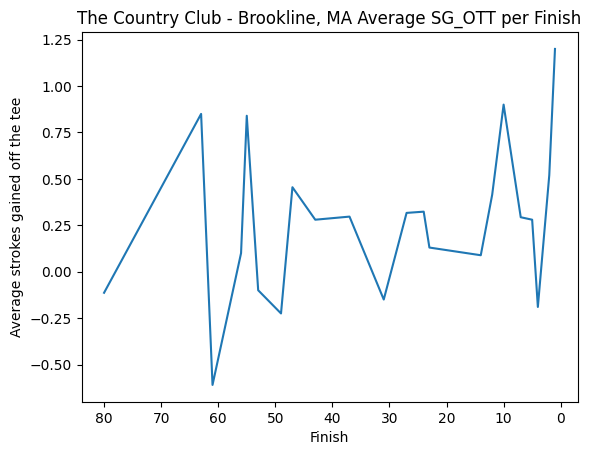

In [106]:
#testing a line plot

# create a copy of the averageStats DataFrame and remove "T" and "cut" values from the index
averageStats_copy = averageStats.copy()
averageStats_copy.index = averageStats_copy.index.astype(str)
averageStats_copy.index = averageStats_copy.index.str.replace("CUT", "80").str.replace("W/D", "80").str.replace("WD", "80").str.replace("DQ", "80").str.replace("MDF", "80").str.replace("T", "").astype(int)
averageStats_copy = averageStats_copy.groupby(averageStats_copy.index).mean()
plt.plot(averageStats_copy.index, averageStats_copy["sg_ott"])
# add labels and title
plt.xlabel("Finish")
plt.ylabel("Average strokes gained off the tee")
plt.title(CourseName + " Average SG_OTT per Finish")

plt.gca().invert_xaxis()
plt.show()

In [107]:
CourseComparisonDF = fullDF[['course','sg_putt','sg_arg','sg_app','sg_ott','sg_t2g','sg_total']]

In [108]:
CourseAverages = CourseComparisonDF.groupby('course').mean()
CourseAverages.head()

,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
course,,,,,,
"Accordia Golf Narashino CC - Chiba, Japan",NaN,NaN,NaN,NaN,NaN,NaN
"Albany - New Providence, Bahamas",NaN,NaN,NaN,NaN,NaN,NaN
"Aronimink Golf Club - Newton Square, PA",0.000145,0.000290,-0.005072,0.001014,-0.003333,-0.007826
"Augusta National Golf Club - Augusta, GA",-0.054231,-0.043333,-0.081795,-0.027692,-0.152692,-0.209487
"Baltusrol - Springfield, NJ",-0.052821,-0.027778,-0.041368,0.072222,0.002991,-0.047009


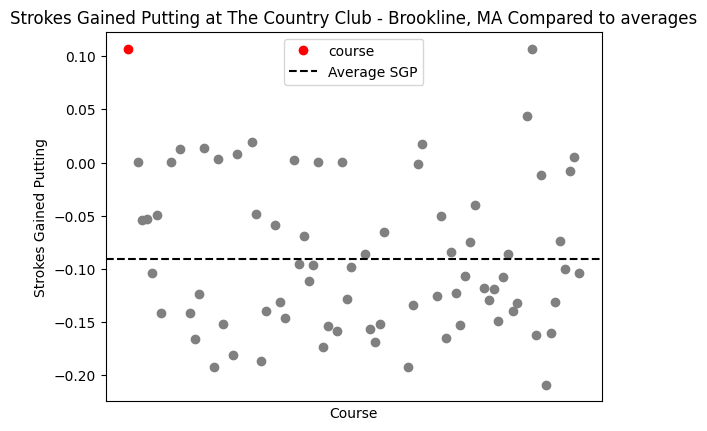

In [109]:
UserCourseSGP = CourseAverages.loc[CourseName, 'sg_putt']
AverageSGP = CourseAverages['sg_putt'].mean()

# Create a dot plot
plt.plot(CourseAverages['sg_putt'], 'o', color='gray')
plt.plot(UserCourseSGP, 'o', color='red', label='course')
plt.axhline(AverageSGP, color='black', linestyle='--', label='Average SGP')
plt.legend()
plt.xlabel('Course')
plt.ylabel('Strokes Gained Putting')
plt.title('Strokes Gained Putting at ' + CourseName + ' Compared to averages')
plt.xticks([])
plt.show()

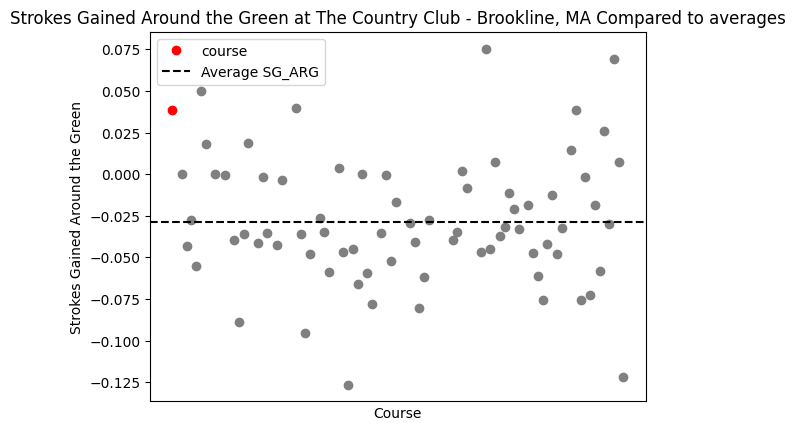

In [110]:
UserCourseSGARG = CourseAverages.loc[CourseName, 'sg_arg']
AverageSGARG = CourseAverages['sg_arg'].mean()

# Create a dot plot
plt.plot(CourseAverages['sg_arg'], 'o', color='gray')
plt.plot(UserCourseSGARG, 'o', color='red', label='course')
plt.axhline(AverageSGARG, color='black', linestyle='--', label='Average SG_ARG')
plt.legend()
plt.xlabel('Course')
plt.ylabel('Strokes Gained Around the Green')
plt.title('Strokes Gained Around the Green at ' + CourseName + ' Compared to averages')
plt.xticks([])
plt.show()

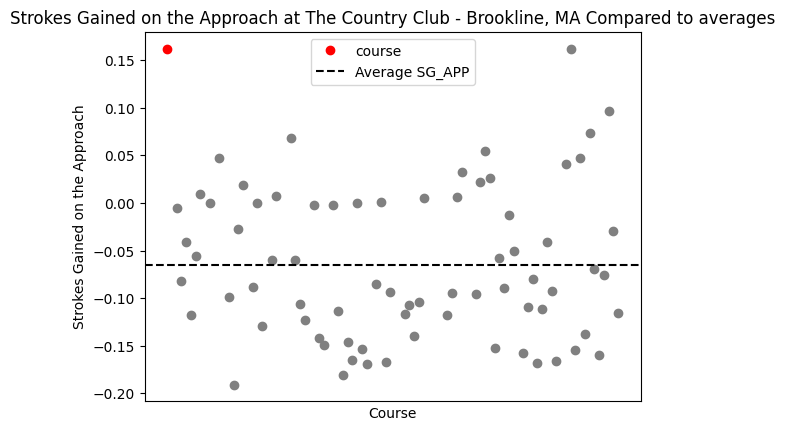

In [111]:
UserCourseSGAPP = CourseAverages.loc[CourseName, 'sg_app']
AverageSGAPP = CourseAverages['sg_app'].mean()

# Create a dot plot
plt.plot(CourseAverages['sg_app'], 'o', color='gray')
plt.plot(UserCourseSGAPP, 'o', color='red', label='course')
plt.axhline(AverageSGAPP, color='black', linestyle='--', label='Average SG_APP')
plt.legend()
plt.xlabel('Course')
plt.ylabel('Strokes Gained on the Approach')
plt.title('Strokes Gained on the Approach at ' + CourseName + ' Compared to averages')
plt.xticks([])
plt.show()

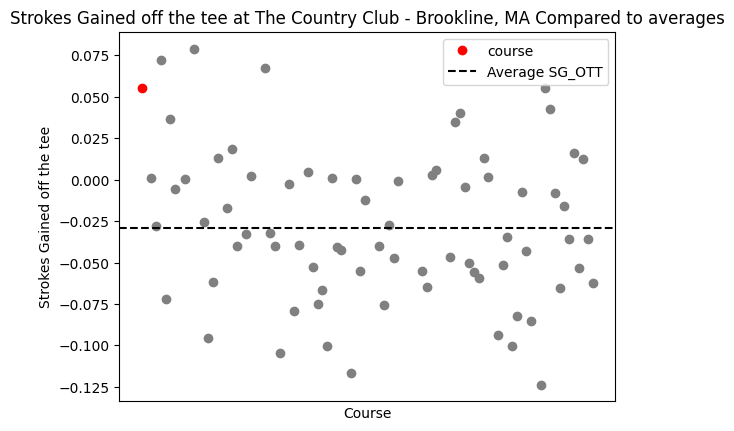

In [112]:
UserCourseSGOTT = CourseAverages.loc[CourseName, 'sg_ott']
AverageSGOTT = CourseAverages['sg_ott'].mean()

# Create a dot plot
plt.plot(CourseAverages['sg_ott'], 'o', color='gray')
plt.plot(UserCourseSGOTT, 'o', color='red', label='course')
plt.axhline(AverageSGOTT, color='black', linestyle='--', label='Average SG_OTT')
plt.legend()
plt.xlabel('Course')
plt.ylabel('Strokes Gained off the tee')
plt.title('Strokes Gained off the tee at ' + CourseName + ' Compared to averages')
plt.xticks([])
plt.show()

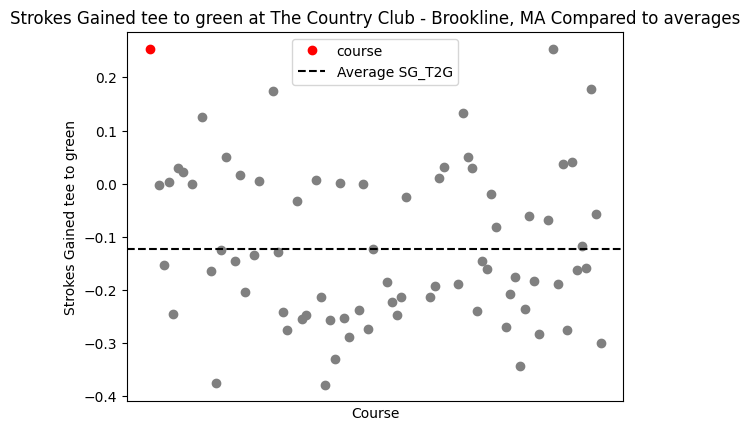

In [113]:
UserCourseSGT2G = CourseAverages.loc[CourseName, 'sg_t2g']
AverageSGT2G = CourseAverages['sg_t2g'].mean()

# Create a dot plot
plt.plot(CourseAverages['sg_t2g'], 'o', color='gray')
plt.plot(UserCourseSGT2G, 'o', color='red', label='course')
plt.axhline(AverageSGT2G, color='black', linestyle='--', label='Average SG_T2G')
plt.legend()
plt.xlabel('Course')
plt.ylabel('Strokes Gained tee to green')
plt.title('Strokes Gained tee to green at ' + CourseName + ' Compared to averages')
plt.xticks([])
plt.show()

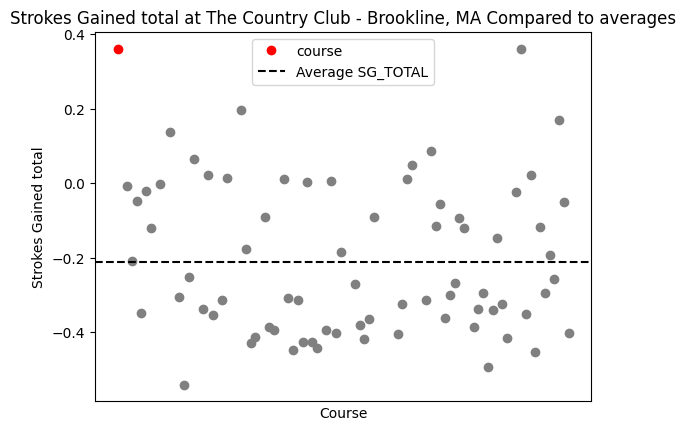

In [114]:
UserCourseSGT = CourseAverages.loc[CourseName, 'sg_total']
AverageSGT = CourseAverages['sg_total'].mean()

# Create a dot plot
plt.plot(CourseAverages['sg_total'], 'o', color='gray')
plt.plot(UserCourseSGT, 'o', color='red', label='course')
plt.axhline(AverageSGT, color='black', linestyle='--', label='Average SG_TOTAL')
plt.legend()
plt.xlabel('Course')
plt.ylabel('Strokes Gained total')
plt.title('Strokes Gained total at ' + CourseName + ' Compared to averages')
plt.xticks([])
plt.show()